In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [6]:
df_ROS[['체중', '신장']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체중      1894 non-null   float64
 1   신장      1894 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [9]:
df_ROS[['체중', '신장']].describe()

,체중,신장
count,1894.000000,1894.000000
mean,68.111140,168.027983
std,11.234318,9.211419
min,35.000000,140.000000
25%,59.700000,161.000000
50%,68.000000,169.000000
75%,75.000000,175.000000
max,136.100000,204.000000


In [22]:
df_ROS['체중_str'] = df_ROS['체중'].astype(str)
df_ROS['신장_str'] = df_ROS['신장'].astype(str)

In [31]:
df_ROS[['체중_str', '신장_str']]

,체중_str,신장_str
0,60.3,163
1,71.7,171
2,77.1,178
3,74.2,174
4,80.7,183
...,...,...
1889,64.0,157
1890,59.0,157
1891,70.0,167
1892,77.0,177


In [53]:
df_ROS['체중_str_num'] = pd.to_numeric(df_ROS['체중_str'])
df_ROS['체중_str_num']

0       60.3
1       71.7
2       77.1
3       74.2
4       80.7
        ... 
1889    64.0
1890    59.0
1891    70.0
1892    77.0
1893    49.0
Name: 체중_str_num, Length: 1894, dtype: float64

In [51]:
df_ROS['신장_str_num'] = pd.to_numeric(df_ROS['신장_str'])
df_ROS['신장_str_num'] 

0       163
1       171
2       178
3       174
4       183
       ... 
1889    157
1890    157
1891    167
1892    177
1893    168
Name: 신장_str_num, Length: 1894, dtype: int64

In [54]:
df_ROS['신장_str_num_M'] = df_ROS['신장_str_num'] * 0.01
df_ROS['신장_str_num_M']

0       1.63
1       1.71
2       1.78
3       1.74
4       1.83
        ... 
1889    1.57
1890    1.57
1891    1.67
1892    1.77
1893    1.68
Name: 신장_str_num_M, Length: 1894, dtype: float64

In [55]:
df_ROS['신장_Mnumber'] = df_ROS['신장_str_num_M'] * df_ROS['신장_str_num_M']
df_ROS['신장_Mnumber']

0       2.6569
1       2.9241
2       3.1684
3       3.0276
4       3.3489
         ...  
1889    2.4649
1890    2.4649
1891    2.7889
1892    3.1329
1893    2.8224
Name: 신장_Mnumber, Length: 1894, dtype: float64

In [56]:
df_ROS['BMI'] = df_ROS['체중_str_num']/df_ROS['신장_Mnumber']
df_ROS['BMI']

0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1889    25.964542
1890    23.936062
1891    25.099502
1892    24.577867
1893    17.361111
Name: BMI, Length: 1894, dtype: float64

In [71]:
df_ROS_wh = df_ROS[['체중', '신장']].copy()
df_ROS_wh

,체중,신장
0,60.3,163
1,71.7,171
2,77.1,178
3,74.2,174
4,80.7,183
...,...,...
1889,64.0,157
1890,59.0,157
1891,70.0,167
1892,77.0,177


In [72]:
df_ROS_wh['BMI'] = df_ROS['BMI']

In [73]:
df_ROS_wh

,체중,신장,BMI
0,60.3,163,22.695623
1,71.7,171,24.520365
2,77.1,178,24.334049
3,74.2,174,24.507861
4,80.7,183,24.097465
...,...,...,...
1889,64.0,157,25.964542
1890,59.0,157,23.936062
1891,70.0,167,25.099502
1892,77.0,177,24.577867


#### 시각화

<Axes: xlabel='BMI', ylabel='Count'>

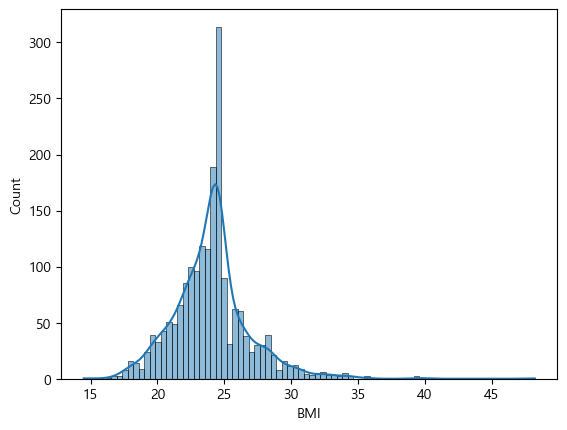

In [74]:
sns.histplot(data=df_ROS_wh, x='BMI', kde=True)

In [75]:
df_ROS_wh.describe()

,체중,신장,BMI
count,1894.000000,1894.000000,1894.000000
mean,68.111140,168.027983,24.035520
std,11.234318,9.211419,2.829173
min,35.000000,140.000000,14.479500
25%,59.700000,161.000000,22.414666
50%,68.000000,169.000000,24.163444
75%,75.000000,175.000000,24.968010
max,136.100000,204.000000,48.221372


In [78]:
# 출처 Chat GPT
def classify_bmi_range(bmi): 
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 23:
        return '정상'
    elif 23 <= bmi < 25:
        return '과체중'
    else:
        return '비만'

In [79]:
df_ROS_wh['비만도'] = df_ROS_wh['BMI'].apply(classify_bmi_range)

In [80]:
df_ROS_wh

,체중,신장,BMI,비만도
0,60.3,163,22.695623,정상
1,71.7,171,24.520365,과체중
2,77.1,178,24.334049,과체중
3,74.2,174,24.507861,과체중
4,80.7,183,24.097465,과체중
...,...,...,...,...
1889,64.0,157,25.964542,비만
1890,59.0,157,23.936062,과체중
1891,70.0,167,25.099502,비만
1892,77.0,177,24.577867,과체중


<Axes: xlabel='비만도', ylabel='Count'>

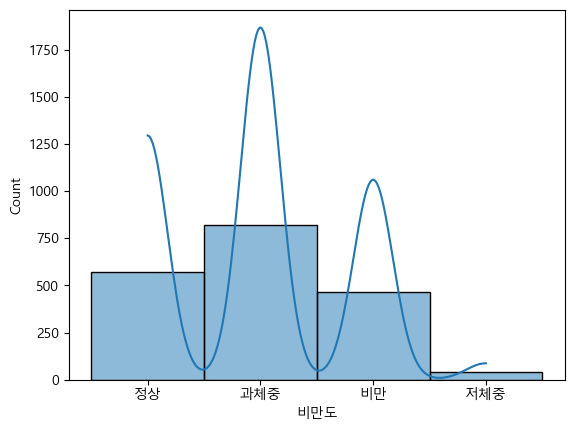

In [82]:
sns.histplot(data=df_ROS_wh, x='비만도', kde=True)

In [84]:
df_ROS_wh['비만도'].value_counts()

과체중    821
정상     569
비만     466
저체중     38
Name: 비만도, dtype: int64

#### 분석
- 위 그래프를 보면 BMI가 대략 23~25 정도에 많이 분포 되어있는 것으로 나와있다.
- 비만도를 보았을 때 과체중이 숫자가 높게 나왔고, 저체중이 가장 적게 나왔다.
- 따라서 환자들 중 과체중 환자들이 많고, 저체중 환자들이 적다고 볼수있다.
- 척추질병이 비만인 환자들에게 많이 발생하고, 저체중인 사람에게 적게 발생한다고 생각된다.